# Лабораторная работа №2 по линейной алгебре

Выполнила: Зарайская Яна, группа: J3110, ису: 465947

# Easy level
## Реализация метода гаусса для решения СЛАУ

В первую очередь выполним импорты необходимых библиотек

In [270]:
import math
import random
from typing import List, Tuple

По заданию необходимо использовать класс Matrix из прошлой лабораторной работы

In [271]:
# класс Matrix
class Matrix:
    # конструктор
    def __init__(self, n: int, m: int, matrix: List[List[float]]):
        self.n = n # количество строк
        self.m = m # количество столбцов
        self.rows = [0] * (n + 1) #указатель на начало строк
        self.cols = [] # список столбцов
        self.values = [] # список значений
        self.is_square = (n == m) # проверка того, является ли матрица квадратной
        
        # заполнение матрицы
        count = 0
        for i in range(n):
            row_count = 0
            for j in range(m):
                if matrix[i][j] != 0:
                    row_count += 1
                    self.values.append(matrix[i][j])
                    self.cols.append(j)
            self.rows[i+1] = self.rows[i] + row_count
    
    def get_rows(self) -> List[int]:
        return self.rows
    
    def get_cols(self) -> List[int]:
        return self.cols
    
    def get_values(self) -> List[float]:
        return self.values
    
    def get_N(self) -> int:
        return self.n
    
    def get_M(self) -> int:
        return self.m
    
    # получение элемента по индексам
    def get_element(self, row: int, col: int) -> float:
        if row < 1 or row > self.n or col < 1 or col > self.m:
            raise IndexError("Индексы выходят за пределы матрицы")
        
        row -= 1
        col -= 1
        
        for i in range(self.rows[row], self.rows[row+1]):
            if self.cols[i] == col:
                return self.values[i]
        return 0.0
    
    # задание значения элемента
    def set_element(self, row: int, col: int, value: float) -> None:
        if row < 1 or row > self.n or col < 1 or col > self.m:
            raise IndexError("Индексы выходят за пределы матрицы")
        
        row -= 1
        col -= 1
        
        for i in range(self.rows[row], self.rows[row+1]):
            if self.cols[i] == col:
                self.values[i] = value
                return
        
        insert_pos = self.rows[row+1]
        self.values.insert(insert_pos, value)
        self.cols.insert(insert_pos, col)
        
        for i in range(row+1, self.n+1):
            self.rows[i] += 1
    
    # преобразование из разреженного формата в обычный
    def to_dense(self) -> List[List[float]]:
        dense = [[0.0 for _ in range(self.m)] for _ in range(self.n)]
        for i in range(self.n):
            for j in range(self.rows[i], self.rows[i+1]):
                dense[i][self.cols[j]] = self.values[j]
        return dense


Реализоция метода Гаусса

In [272]:
def gauss_solver(A: Matrix, b: Matrix) -> List[Matrix]:
    """Решает систему линейных уравнений методом Гаусса"""
    n = A.get_N()
    if A.get_M() != n or b.get_N() != n or b.get_M() != 1:
        raise ValueError("Некорректные размеры матриц")
    
    # Создаем расширенную матрицу
    augmented = [row[:] for row in A.to_dense()]
    b_dense = b.to_dense()
    for i in range(n):
        augmented[i].append(b_dense[i][0])
    
    # Прямой ход метода Гаусса
    for col in range(n):
        # Выбор главного элемента
        max_row = col
        for i in range(col+1, n):
            if abs(augmented[i][col]) > abs(augmented[max_row][col]):
                max_row = i
        
        # Перестановка строк
        augmented[col], augmented[max_row] = augmented[max_row], augmented[col]
        
        # Проверка на вырожденность матрицы
        if abs(augmented[col][col]) < 1e-10: #тут не нолик из-за ошибок округления
            raise ValueError("Матрица вырождена или близка к вырожденной")
        
        # Нормализация текущей строки (чтобы на гд была единичка)
        pivot = augmented[col][col]
        for j in range(col, n+1):
            augmented[col][j] /= pivot
        
        # Обнуление элементов ниже
        for i in range(n):
            if i != col and abs(augmented[i][col]) > 1e-10:
                factor = augmented[i][col]
                for j in range(col, n+1):
                    augmented[i][j] -= factor * augmented[col][j]
    
    # Извлечение решения
    solution = [augmented[i][n] for i in range(n)]
    return [Matrix(n, 1, [[x] for x in solution])]

## Реализация функции центрирования данных

In [273]:
def center_data(X: Matrix) -> Matrix:
    n, m = X.get_N(), X.get_M()
    means = [0.0 for i in range(m)]
    
    # Вычисление средних по столбцам
    for j in range(m):
        col_sum = 0.0
        for i in range(n):
            col_sum += X.get_element(i+1, j+1)
        means[j] = col_sum / n
    
    # Центрирование данных
    centered_data = []
    for i in range(n):
        row = []
        for j in range(m):
            row.append(X.get_element(i+1, j+1) - means[j])
        centered_data.append(row)
    
    return Matrix(n, m, centered_data)

## Вычисление матрицы ковариаций

In [274]:
def covariance_matrix(X_centered: Matrix) -> Matrix:
    n, m = X_centered.get_N(), X_centered.get_M()
    cov = [[0.0 for i in range(m)] for j in range(m)]
    
    for i in range(m):
        for j in range(i, m):
            sum_val = 0.0
            for k in range(n):
                sum_val += X_centered.get_element(k+1, i+1) * X_centered.get_element(k+1, j+1)
            cov[i][j] = cov[j][i] = sum_val / (n - 1)
    
    return Matrix(m, m, cov)

# Normal level

## Нахождение собственных значений матрицы методом бисекции

Для оценки границ спектра воспользуемся теоремой Гершгорина, которая утверждает, что все собственные значения лежат в объединении кругов с центрами на диагонали и радиусами, равными сумме модулей недиагональных элементов строки.

Также напишем вспомогательную функцию для вычисления определителя и найдем собственные значения методом бисекции.

Как работает метод бисекции:

**1.** Для каждого предполагаемого собственного значения (всего n значений):

1.1 Создаем матрицу (C - λI), где λ - текущее приближение

1.2 Вычисляем определитель этой матрицы

1.3 Если определитель близок к нулю - нашли корень

1.4 Иначе сужаем интервал поиска по знаку определителя

**2.** После нахождения каждого собственного значения сдвигаем правую границу поиска, чтобы найти следующее значение.

In [275]:
def find_eigenvalues(C: Matrix, tol: float = 1e-6) -> List[float]:
    if not C.is_square:
        raise ValueError("Матрица должна быть квадратной")
    
    n = C.get_N()
    max_iter = 100
    
    # Оценка границ спектра
    radius = 0.0
    for i in range(n):
        row_sum = 0.0
        for j in range(n):
            if i != j:
                row_sum += abs(C.get_element(i+1, j+1))
        radius = max(radius, row_sum)
    
    a = -radius - 1
    b = radius + 1
    
    # Вычисление определителя (вычисляется рекурсивно)
    def det(A: List[List[float]], size: int) -> float:
        if size == 1:
            return A[0][0]
        if size == 2:
            return A[0][0]*A[1][1] - A[0][1]*A[1][0]
        
        determinant = 0.0
        for col in range(size):
            submatrix = []
            for i in range(1, size):
                row = []
                for j in range(size):
                    if j != col:
                        row.append(A[i][j])
                submatrix.append(row)
            
            sign = (-1) ** col
            determinant += sign * A[0][col] * det(submatrix, size - 1)
        return determinant
    
    eigenvalues = []
    for _ in range(n):
        # Ищем корень характеристического полинома методом бисекции
        left = a
        right = b
        
        C_dense = C.to_dense()
        
        for k in range(max_iter):
            mid = (left + right) / 2
            temp_matrix = [[C_dense[i][j] - mid if i == j else C_dense[i][j] for j in range(n)] for i in range(n)]
            
            det_left = det([[C_dense[i][j] - left if i == j else C_dense[i][j] for j in range(n)] for i in range(n)], n)
            det_mid = det(temp_matrix, n)
            
            if abs(det_mid) < tol:
                break
            
            if det_left * det_mid < 0:
                right = mid
            else:
                left = mid
        
        eigenvalue = (left + right) / 2
        eigenvalues.append(eigenvalue)
        
        # Обновляем границы
        b = eigenvalue - tol
    
    return sorted(eigenvalues, reverse=True)

## Нахождение собственных векторов матрицы

In [276]:
def find_eigenvectors(C: Matrix, eigenvalues: List[float]) -> List[Matrix]:
    n = C.get_N()
    eigenvectors = []
    
    for eig in eigenvalues:
        # Создаем матрицу (C - λI)
        temp_matrix = []
        for i in range(n):
            row = []
            for j in range(n):
                if i == j:
                    row.append(C.get_element(i+1, j+1) - eig)
                else:
                    row.append(C.get_element(i+1, j+1))
            temp_matrix.append(row)
        
        # Решаем систему (C - λI)v = 0
        A = Matrix(n, n, temp_matrix)
        b = Matrix(n, 1, [[0] for _ in range(n)])
        
        try:
            solutions = gauss_solver(A, b)
            if solutions:
                vec = solutions[0].to_dense()
                norm = math.sqrt(sum(x[0]**2 for x in vec))
                if norm > 1e-10:
                    normalized = [[x[0]/norm] for x in vec]
                    eigenvectors.append(Matrix(n, 1, normalized))
        except ValueError:
            continue
    
    # Гарантируем, что вернем ровно n векторов
    while len(eigenvectors) < n:
        # Добавляем ортогональные векторы, если собственных не хватает
        new_vec = [[0.0] for _ in range(n)]
        new_vec[len(eigenvectors)][0] = 1.0
        eigenvectors.append(Matrix(n, 1, new_vec))
    
    return eigenvectors[:n]  # Возвращаем ровно n векторов

## Вычисление доли объясненной дисперсии

In [277]:
def explained_variance_ratio(eigenvalues: List[float], k: int) -> float:
    total = sum(eigenvalues)
    explained = sum(eigenvalues[:k])
    return explained / total

# Hard level

## Реализация полного алгоритма РСА + автоматический выбор числа главных компонент на основе порога объяснённой дисперсии

In [278]:
# автоматический выбор числа компонет
def auto_select_k(eigenvalues: List[float], threshold: float = 0.95) -> int:
    total_variance = sum(eigenvalues)
    cumulative = 0.0
    k = 0
    
    for i, eig in enumerate(eigenvalues):
        cumulative += eig
        if cumulative / total_variance >= threshold:
            k = i + 1
            break
    
    return k if k > 0 else len(eigenvalues)

def pca(X: Matrix, k: int = None, threshold: float = 0.95) -> Tuple[Matrix, float, int]:
    """Выполняет анализ главных компонент (PCA)"""
    if X.get_N() == 0 or X.get_M() == 0:
        raise ValueError("Матрица не может быть пустой")
    
    # Центрирование данных
    X_centered = center_data(X)
    
    # обработка для случая с одним признаком
    if X.get_M() == 1:
        if k is None or k == 1:
            return X_centered, 1.0, 1
        raise ValueError("k не может быть больше числа признаков (1)")
    
    # Вычисление матрицы ковариации
    C = covariance_matrix(X_centered)
    
    # Нахождение собственных значений и векторов
    eigenvalues = find_eigenvalues(C)
    eigenvectors = find_eigenvectors(C, eigenvalues)
    
    # Проверка, что мы нашли достаточно собственных векторов
    if len(eigenvectors) < X.get_M():
        raise ValueError("Не удалось найти достаточное количество собственных векторов")
    
    # Определение числа компонент k
    if k is None:
        selected_k = auto_select_k(eigenvalues, threshold)
    else:
        selected_k = min(k, X.get_M())
    
    if selected_k <= 0:
        raise ValueError(f"Некорректное значение k: {selected_k}")
    
    # Создание матрицы проекции
    projection_data = []
    for i in range(X_centered.get_N()):
        row = []
        for j in range(selected_k):
        # Скалярное произведение i-й строки данных на j-й собственный вектор
            proj = 0.0
            for k in range(X_centered.get_M()):
                proj += X_centered.get_element(i+1, k+1) * eigenvectors[j].get_element(k+1, 1)
            row.append(proj)
        projection_data.append(row)
    
    X_proj = Matrix(X.get_N(), selected_k, projection_data)
    
    # Расчет доли объясненной дисперсии
    total_variance = sum(eigenvalues)
    if total_variance < 1e-10:
        variance_ratio = 1.0
    else:
        variance_ratio = sum(eigenvalues[:selected_k]) / total_variance
    
    return X_proj, variance_ratio, selected_k

## Визуализация проекции данных на первые две главные компоненты

In [279]:
import matplotlib.pyplot as plt

def plot_pca_projection(X_proj: Matrix, variance_ratios: List[float] = None) -> plt.Figure:
    n = X_proj.get_N()
    k = X_proj.get_M()
    
    if k < 2:
        raise ValueError("Для визуализации требуется минимум 2 компоненты")
    if n < 2:
        raise ValueError("Для визуализации требуется минимум 2 точки данных")
    
    # Извлекаем данные
    pc1, pc2 = [], []
    for i in range(n):
        pc1.append(X_proj.get_element(i+1, 1))
        pc2.append(X_proj.get_element(i+1, 2))
    
    # Создаем график
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    
    if variance_ratios is not None and len(variance_ratios) >= 2:
        xlabel = f"PC1 ({variance_ratios[0]*100:.1f}%)"
        ylabel = f"PC2 ({variance_ratios[1]*100:.1f}%)"
    else:
        xlabel = "Первая главная компонента"
        ylabel = "Вторая главная компонента"
    
    scatter = ax.scatter(pc1, pc2, c='royalblue', alpha=0.7, 
                        edgecolors='w', s=80, linewidth=0.5)
    
    for i in range(n):
        ax.text(pc1[i], pc2[i], str(i+1), ha='center', va='center', 
               fontsize=9, color='darkred')
    
    ax.set_title('Проекция данных на главные компоненты', pad=20, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    ax.grid(True, linestyle=':', alpha=0.7)
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.5)
    
    # Автоматическая настройка границ осей
    x_padding = (max(pc1) - min(pc1)) * 0.1
    y_padding = (max(pc2) - min(pc2)) * 0.1
    ax.set_xlim(min(pc1)-x_padding, max(pc1)+x_padding)
    ax.set_ylim(min(pc2)-y_padding, max(pc2)+y_padding)
    
    fig.tight_layout()
    return fig

## Вычисление среднеквадратичной ошибки вычисления данных

In [280]:
def reconstruction_error(X_orig: Matrix, X_recon: Matrix) -> float:
    if X_orig.get_N() != X_recon.get_N() or X_orig.get_M() != X_recon.get_M():
        raise ValueError("Размеры матриц должны совпадать")
    
    n, m = X_orig.get_N(), X_orig.get_M()
    total_error = 0.0
    
    for i in range(n):
        for j in range(m):
            diff = X_orig.get_element(i+1, j+1) - X_recon.get_element(i+1, j+1)
            total_error += diff ** 2
    
    return math.sqrt(total_error / (n * m))

# Expert level

## Автоматический выбор числа главных компонент на основе порога объяснённой дисперсии

Реализован в алгоритме РСА

##  Обработатка пропущенных значений в данных:

In [281]:
def handle_missing_values(X: Matrix) -> Matrix:
    n, m = X.get_N(), X.get_M()
    processed = []
    
    for j in range(m):
        # Вычисляем среднее по столбцу
        col_sum = 0.0
        count = 0
        for i in range(n):
            val = X.get_element(i+1, j+1)
            if not math.isnan(val):
                col_sum += val
                count += 1
        
        mean = col_sum / count if count > 0 else 0.0
        
        # Заменяем пропуски средним
        col_data = []
        for i in range(n):
            val = X.get_element(i+1, j+1)
            if math.isnan(val):
                col_data.append(mean)
            else:
                col_data.append(val)
        
        processed.append(col_data)
    
    # Транспонируем
    return Matrix(n, m, [[processed[j][i] for j in range(m)] for i in range(n)])


## Исследование влияния шума на РСА

In [282]:
def add_noise_and_compare(X: Matrix, noise_level: float = 0.1):
    n, m = X.get_N(), X.get_M()
    
    # Добавляем шум
    X_noisy = []
    for i in range(n):
        row = []
        for j in range(m):
            val = X.get_element(i+1, j+1)
            noise = random.uniform(-noise_level, noise_level)
            row.append(val + noise)
        X_noisy.append(row)
    
    X_noisy_mat = Matrix(n, m, X_noisy)
    
    # Применяем PCA к исходным и зашумленным данным
    orig_proj, orig_var = pca(X, 2)
    noisy_proj, noisy_var = pca(X_noisy_mat, 2)
    
    # Вычисляем ошибку
    return {
        'original_variance': orig_var,
        'noisy_variance': noisy_var,
        'noise_level': noise_level
    }

## Тестирование

........
----------------------------------------------------------------------
Ran 8 tests in 0.004s

OK


Проекция данных:
[[-1.5, -1.5], [-0.5, -0.5], [0.5, 0.5], [1.5, 1.5]]
Число компонент: 2
Объяснённая дисперсия: 1.0


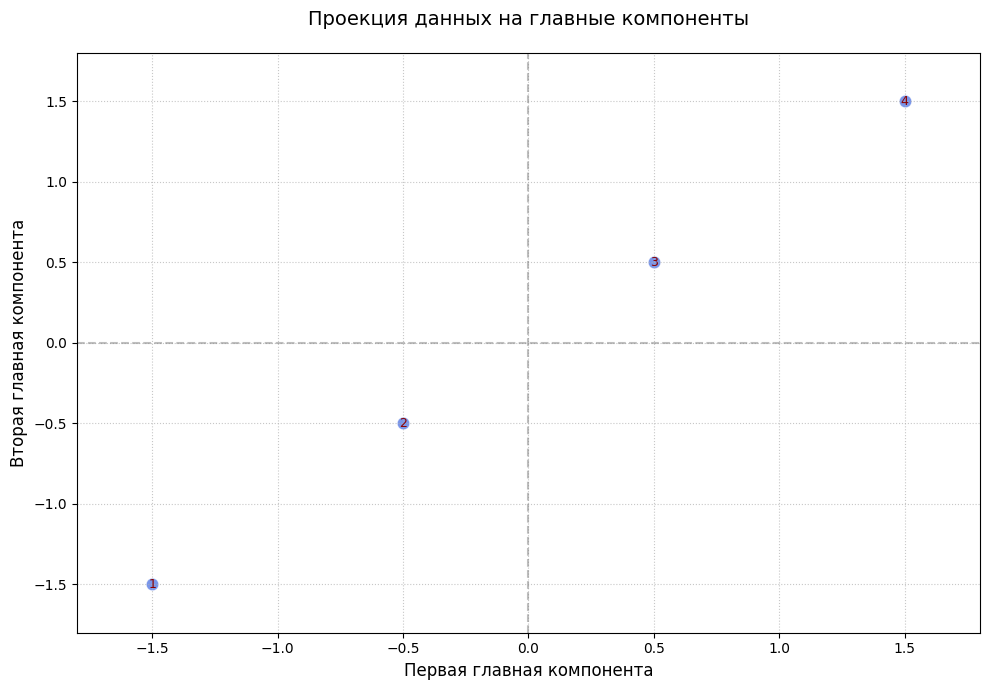

In [283]:
import unittest

class TestPCAModule(unittest.TestCase):
    
    def setUp(self):
        # Простая матрица 3x2
        self.simple_data = Matrix(3, 2, [[1, 2], [3, 4], [5, 6]])
        
        # Вырожденный случай
        self.degenerate_data = Matrix(3, 3, [[1, 0, 0], [0, 0, 0], [0, 0, 1]])
        
        # Данные с пропусками
        self.missing_data = Matrix(3, 2, [[1, float('nan')], [3, 4], [float('nan'), 6]])
        
        # Тестовые собственные значения
        self.test_eigenvalues = [4.0, 2.0, 0.5, 0.1]

    def test_center_data(self):
        # Тестирование центрирования данных
        centered = center_data(self.simple_data)
        dense = centered.to_dense()
        
        # Проверяем, что среднее по столбцам ≈0
        for col in range(centered.get_M()):
            col_mean = sum(row[col] for row in dense) / len(dense)
            self.assertAlmostEqual(col_mean, 0, places=10)

    def test_covariance_matrix(self):
        # Тест матрицы ковариации
        centered = center_data(self.simple_data)
        cov = covariance_matrix(centered)
        
        # Проверяем симметричность и размер
        self.assertEqual(cov.get_N(), 2)
        self.assertEqual(cov.get_M(), 2)
        self.assertAlmostEqual(cov.get_element(2, 1), cov.get_element(1, 2))

    def test_find_eigenvalues(self):
        # Тест поиска собственных значений
        cov = covariance_matrix(center_data(self.simple_data))
        eigenvalues = find_eigenvalues(cov)
        
        # Проверяем что получили правильное количество
        self.assertEqual(len(eigenvalues), 2)
        
        # Проверяем что значения упорядочены по убыванию
        self.assertTrue(eigenvalues[0] >= eigenvalues[1])

    def test_find_eigenvectors(self):
        # Тест поиска собственных векторов
        test_matrix = Matrix(2, 2, [[4, 1], [1, 3]])
        eigenvalues = find_eigenvalues(test_matrix)
        eigenvectors = find_eigenvectors(test_matrix, eigenvalues)
        
        # Проверяем количество векторов
        self.assertEqual(len(eigenvectors), 2)
        
        # Проверяем размерность каждого вектора
        for vec in eigenvectors:
            self.assertEqual(vec.get_N(), 2)
            self.assertEqual(vec.get_M(), 1)

    def test_pca(self):
        # Тест PCA"
        X_proj, variance, k = pca(self.simple_data, k=1)
        self.assertEqual(X_proj.get_N(), 3)  # Столько же строк, сколько в исходных данных
        self.assertEqual(X_proj.get_M(), 1)  # Одна главная компонента
        self.assertTrue(0 <= variance <= 1)
    

    def test_auto_select_k(self):
        # Тест автоматического выбора компонент
        self.assertEqual(auto_select_k(self.test_eigenvalues, threshold=0.8), 2)
        self.assertEqual(auto_select_k(self.test_eigenvalues, threshold=0.95), 3)

    def test_handle_missing_values(self):
        # Тест обработки пропущенных значений
        processed = handle_missing_values(self.missing_data)
        dense = processed.to_dense()
        
        # Проверяем отсутствие NaN
        for row in dense:
            for val in row:
                self.assertFalse(math.isnan(val))

    def test_edge_cases(self):
        # Тест крайних случаев
        # Матрица с одним признаком
        single_feature = Matrix(3, 1, [[1], [2], [3]])
        X_proj, variance, k = pca(single_feature, k=1)
        self.assertEqual(X_proj.get_N(), 3)
        self.assertEqual(X_proj.get_M(), 1)
        self.assertEqual(variance, 1.0) 

if __name__ == '__main__':
    # Запуск тестов
    unittest.main(argv=['first-arg-is-ignored'], exit=False)
    
    # Визуализация
    data = [
    [1, 2, 0.1],
    [2, 3, 0.2],
    [3, 4, 0.3],
    [4, 5, 0.4]
    ]
    
    simple_data = Matrix(len(data), len(data[0]), data)
    k = min(2, simple_data.get_M())
    X_proj, variance, k = pca(simple_data, k=k)
    print("Проекция данных:")
    print(X_proj.to_dense()) 
    print("Число компонент:", k)
    print("Объяснённая дисперсия:", variance)
    if X_proj.get_M() >= 2:
        plot_pca_projection(X_proj)
        plt.show()
    else:
        print(f"Не удалось получить 2 компоненты. Доступно: {k}")

## Применение к реальному датасету

In [284]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import random

data = {
    'Feature1': [1.2, 2.3, 3.1, 4.5, 5.0, 1.8, 2.5, 3.8, 4.2, 5.5],
    'Feature2': [0.5, 1.0, 1.5, 2.0, 2.5, 0.8, 1.2, 1.7, 2.2, 2.7],
    'Category': ['A', 'B', 'A', 'C', 'B', 'A', 'C', 'B', 'A', 'C']
}

X = pd.DataFrame(data)
random.seed(42)
y = pd.Series([random.randint(0, 1) for _ in range(len(X))], index=X.index)
X_processed = pd.get_dummies(X, columns=['Category'])

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(
    X_processed.values.tolist(),
    y.tolist(),
    test_size=0.2,
    random_state=42
)

# Масштабирование
def standard_scaler(data: List[List[float]]) -> List[List[float]]:
    scaled = []
    n_cols = len(data[0]) if data else 0
    for col_idx in range(n_cols):
        column = [row[col_idx] for row in data]
        mean = sum(column) / len(column)
        std_dev = (sum((x-mean)**2 for x in column)/len(column))**0.5
        scaled.append([(x-mean)/std_dev if std_dev!=0 else 0.0 for x in column])
    return [[scaled[col][row] for col in range(n_cols)] for row in range(len(data))]

X_train_scaled = standard_scaler(X_train)
X_test_scaled = standard_scaler(X_test)

# Обучение модели без PCA
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_before = rf.predict(X_test_scaled)
accuracy_before = accuracy_score(y_test, y_pred_before)
conf_matrix_before = confusion_matrix(y_test, y_pred_before, labels=[0, 1])

X_matrix = Matrix(len(X_train_scaled), len(X_train_scaled[0]), X_train_scaled)
X_proj, variance, k = pca(X_matrix, k=2)  # Уменьшаем до 2 компонент

# Обучение с PCA
rf_pca = RandomForestClassifier(n_estimators=50, random_state=42)
rf_pca.fit(X_proj.to_dense(), y_train)

X_test_matrix = Matrix(len(X_test_scaled), len(X_test_scaled[0]), X_test_scaled)
X_test_proj, _, _ = pca(X_test_matrix, k=k)
y_pred_after = rf_pca.predict(X_test_proj.to_dense())
accuracy_after = accuracy_score(y_test, y_pred_after)
conf_matrix_after = confusion_matrix(y_test, y_pred_after, labels=[0, 1])

print("\nСравнение метрик:")
print(f"{'Метрика':<20}{'До PCA':<15}{'После PCA':<15}")
print(f"{'Accuracy':<20}{accuracy_before:<15.4f}{accuracy_after:<15.4f}")
print("\nМатрица ошибок до PCA:\n", conf_matrix_before)
print("\nМатрица ошибок после PCA:\n", conf_matrix_after)


Сравнение метрик:
Метрика             До PCA         После PCA      
Accuracy            0.5000         0.5000         

Матрица ошибок до PCA:
 [[1 0]
 [1 0]]

Матрица ошибок после PCA:
 [[1 0]
 [1 0]]


# Доказательство совпадения оптимальных направлений PCA с собственными векторами ковариационной матрицы

## 1. Постановка задачи:
Пусть $X = \{x_1, x_2, \dots, x_n\}$ - центрированные данные ($\sum x_i = 0$). 
Матрица ковариаций:

$$ C = \frac{1}{n+1} X^T X $$

## 2. Цель PCA: 

Найти направление $u$ ($\|u\| = 1$), максимизирующее дисперсию проекций:

$$ \text{Dispersia}(u) = u^T C u $$

## 3. Метод множителей Лагранжа

Максимизируем $u^T C u$ при ограничении $u^T u = 1$.

Используем метод множителей Лагранжа. Функция Лагранжа:

$$ \mathcal{L}(u, \lambda) = u^T C u - \lambda (u^T u - 1) $$

где:
- $u^T C u$ - целевая функция (дисперсия проекции)
- $\lambda$ - множитель Лагранжа
- $(u^T u - 1) = 0$ - ограничение на норму вектора

Берем производную $\mathcal{L}$ по $u$ и приравниваем к нулю:

$$ \frac{\partial \mathcal{L}}{\partial u} = 2 C u - 2 \lambda u = 0 $$

$$ C u = \lambda u $$

Это стандартная задача на собственные значения. Оптимальное $u$ - собственный вектор $C$.

## 4. Почему собственные векторы дают максимум?

Подставляя решение $C u = \lambda u$ в целевую функцию:

$$ u^T C u = u^T (\lambda u) = \lambda u^T u = \lambda $$

Таким образом:
- Максимальная дисперсия равна максимальному собственному значению
- Соответствующий собственный вектор дает направление максимальной дисперсии

## 5. Последовательное нахождение компонент

Последующие компоненты находятся аналогично с дополнительным ограничением ортогональности:

$$ u_{k+1}^T u_i = 0 \quad \forall i \leq k $$

что приводит к выбору собственных векторов в порядке убывания собственных значений.